In [1]:
# Importing libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

Steps to be followed:
- EDA
    - Read and understand data
    - Data cleanup
        - Missing value handling
        - Outlier handling
    - Data visualisation
        - Univariate analysis
        - Bivariate analysis
        - Multivariate analysis
- Data preperation for model building
- Model building and feature engineering
- Model validation

## EDA

### Read and understand data

In [2]:
# Reading the data file and converting it to a pandas dataset
leads_original = pd.read_csv("Leads.csv")

In [3]:
# Changing the options to see all the columns present in dataset
pd.set_option('display.max_columns', None, 'display.max_colwidth', None)

In [4]:
# Data preview
leads_original.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Checking info of the entire dataset
leads_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- Looks like there are several columns with non numeric data.

- Missing values are present in dataset

In [6]:
# checking the details for columns with numeric data type
leads_original.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


Observations from above output:
- Converted is target variable so ignore the summary of this.
- Columns TotalVisits and Total Time Spent on Website might have few outliers in them.

Lets study the data from each columns and decide which columns are needed for analysis

Observations:
- Columns 'Prospect ID' and 'Lead Number' might have unique values identifying the visitor. As these wont coontribute in analysing any pattern in data we can drop these columns.
- Coulmns with Contineous variables: 'Total Time Spent on Website', 'Page Views Per Visit', 'TotalVisits' have contineous variables.
- Coulmns with Binary variables: Shown in below output where Unique count is either 2 or 1

In [7]:
# Columns 'Prospect ID' and 'Lead Number' might have unique values identifying the visitor.
# As these wont coontribute in analysing any pattern in data we can drop these columns.
leads_original = leads_original.drop(columns=['Prospect ID', 'Lead Number'])

In [8]:
# Identifying columns with catagorical variables
unique_values = pd.DataFrame({
    'Column name': [i for i in leads_original.select_dtypes(include=object).columns],
    'Unique Values': [', '.join(str(item) for item in leads_original[i].unique().tolist()) 
                      for i in leads_original.select_dtypes(include=object).columns],
    'Unique Count': [len(leads_original[i].unique()) 
                     for i in leads_original.select_dtypes(include=object).columns]
})

unique_values.sort_values(by='Unique Count', ascending=False).reset_index()

,index,Column name,Unique Values,Unique Count
0,5,Country,"nan, India, Russia, Kuwait, Oman, United Arab Emirates, United States, Australia, United Kingdom, Bahrain, Ghana, Singapore, Qatar, Saudi Arabia, Belgium, France, Sri Lanka, China, Canada, Netherlands, Sweden, Nigeria, Hong Kong, Germany, Asia/Pacific Region, Uganda, Kenya, Italy, South Africa, Tanzania, unknown, Malaysia, Liberia, Switzerland, Denmark, Philippines, Bangladesh, Vietnam, Indonesia",39
1,18,Tags,"Interested in other courses, Ringing, Will revert after reading the email, nan, Lost to EINS, In confusion whether part time or DLP, Busy, switched off, in touch with EINS, Already a student, Diploma holder (Not Eligible), Graduation in progress, Closed by Horizzon, number not provided, opp hangup, Not doing further education, invalid number, wrong number given, Interested in full time MBA, Still Thinking, Lost to Others, Shall take in the next coming month, Lateral student, Interested in Next batch, Recognition issue (DEC approval), Want to take admission but has financial problems, University not recognized",27
2,1,Lead Source,"Olark Chat, Organic Search, Direct Traffic, Google, Referral Sites, Welingak Website, Reference, google, Facebook, nan, blog, Pay per Click Ads, bing, Social Media, WeLearn, Click2call, Live Chat, welearnblog_Home, youtubechannel, testone, Press_Release, NC_EDM",22
3,6,Specialization,"Select, Business Administration, Media and Advertising, nan, Supply Chain Management, IT Projects Management, Finance Management, Travel and Tourism, Human Resource Management, Marketing Management, Banking, Investment And Insurance, International Business, E-COMMERCE, Operations Management, Retail Management, Services Excellence, Hospitality Management, Rural and Agribusiness, Healthcare Management, E-Business",20
4,4,Last Activity,"Page Visited on Website, Email Opened, Unreachable, Converted to Lead, Olark Chat Conversation, Email Bounced, Email Link Clicked, Form Submitted on Website, Unsubscribed, Had a Phone Conversation, View in browser link Clicked, nan, Approached upfront, SMS Sent, Visited Booth in Tradeshow, Resubscribed to emails, Email Received, Email Marked Spam",18
5,28,Last Notable Activity,"Modified, Email Opened, Page Visited on Website, Email Bounced, Email Link Clicked, Unreachable, Unsubscribed, Had a Phone Conversation, Olark Chat Conversation, SMS Sent, Approached upfront, Resubscribed to emails, View in browser link Clicked, Form Submitted on Website, Email Received, Email Marked Spam",16
6,7,How did you hear about X Education,"Select, Word Of Mouth, Other, nan, Online Search, Multiple Sources, Advertisements, Student of SomeSchool, Email, Social Media, SMS",11
7,23,City,"Select, Mumbai, nan, Thane & Outskirts, Other Metro Cities, Other Cities, Other Cities of Maharashtra, Tier II Cities",8
8,22,Lead Profile,"Select, Potential Lead, nan, Other Leads, Lateral Student, Dual Specialization Student, Student of SomeSchool",7
9,8,What is your current occupation,"Unemployed, Student, nan, Working Professional, Businessman, Other, Housewife",7


-

### Data cleanup

#### Missing value handling

In [9]:
# Checking for null value counts
null_values = pd.DataFrame({
    'Column':leads_original.columns,
    'Null Count': [leads_original[i].isna().sum() for i in leads_original.columns],
    'Null Percent': [round(leads_original[i].isna().mean(), 2) * 100 for i in leads_original.columns ]
})
null_values.sort_values(by='Null Count', ascending=False)

,Column,Null Count,Null Percent
23,Lead Quality,4767,52.0
28,Asymmetrique Activity Index,4218,46.0
31,Asymmetrique Profile Score,4218,46.0
29,Asymmetrique Profile Index,4218,46.0
30,Asymmetrique Activity Score,4218,46.0
22,Tags,3353,36.0
26,Lead Profile,2709,29.0
13,What matters most to you in choosing a course,2709,29.0
12,What is your current occupation,2690,29.0
9,Country,2461,27.0


In [10]:
# Filtering columns with more than 40% missing values. These columns can be dropped
drop_cols = null_values.Column[null_values['Null Percent']>40].tolist()

drop_cols

['Lead Quality',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [11]:
# There are few columns which have only 1 unique value in them.
# These are called constant columns as they are not contributing to pattern recognition.
# We can identify and drop these columns from dataset.
for i in unique_values['Column name'][unique_values['Unique Count']==1]:
    drop_cols.append(i)
drop_cols

['Lead Quality',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score',
 'Magazine',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [12]:
# Dropping columns which are not contributing to pattern recognition and which have more than 40% missing valies
leads_col_drop = leads_original.drop(columns=drop_cols)
leads_original.shape, leads_col_drop.shape

((9240, 35), (9240, 25))

In [13]:
# Identifying the columns where the objects can be dropped which have missing values
few_na = null_values.Column[(null_values['Null Count']>0) & (null_values['Null Percent']<5)].tolist()
few_na

['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity']

In [14]:
leads_col_drop = leads_col_drop.dropna(subset=few_na)

In [15]:
leads_col_drop.shape

(9074, 25)

In [16]:
# Checking for null value counts
null_values = pd.DataFrame({
    'Column':leads_col_drop.columns,
    'Null Percent': [round(leads_col_drop[i].isna().mean(), 2) * 100 for i in leads_col_drop.columns ]
})
null_values.sort_values(by='Null Percent', ascending=False)

,Column,Null Percent
20,Tags,37.0
12,What is your current occupation,30.0
21,Lead Profile,30.0
13,What matters most to you in choosing a course,30.0
9,Country,25.0
11,How did you hear about X Education,24.0
22,City,16.0
10,Specialization,16.0
15,Newspaper Article,0.0
23,A free copy of Mastering The Interview,0.0


In [17]:
# Identifying the columns where we still have missing values which need to be imputated
remaining_na = null_values.Column[(null_values['Null Percent']>0)].tolist()
remaining_na

['Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'Lead Profile',
 'City']

In [18]:
for i in remaining_na:
    print(f'For Column {i}, the value counts are \n\n{leads_col_drop[i].value_counts(normalize=True, dropna=False)}\n\n')

For Column Country, the value counts are 

India                   0.715341
NaN                     0.253031
United States           0.007604
United Arab Emirates    0.005841
Singapore               0.002645
Saudi Arabia            0.002314
United Kingdom          0.001653
Australia               0.001433
Qatar                   0.001102
Bahrain                 0.000771
Hong Kong               0.000771
Oman                    0.000661
France                  0.000661
unknown                 0.000551
Kuwait                  0.000441
South Africa            0.000441
Canada                  0.000441
Nigeria                 0.000441
Germany                 0.000441
Sweden                  0.000331
Philippines             0.000220
Uganda                  0.000220
Italy                   0.000220
Bangladesh              0.000220
Netherlands             0.000220
Asia/Pacific Region     0.000220
China                   0.000220
Belgium                 0.000220
Ghana                   0.000220


Observations:


-- Imputing to mode of column
- For the column 'Country' we have 25% missing values and more than 72% are from India so we could fill the missing values as India


-- NaN = 'Select'
- For the column 'Lead Profile' the top 2 Entries are Select with 45% NaN with 30% value count. Since both represent missing value we can fill missing valies as 'Select'
- For the column 'City' the 2nd and 3rd Entries are Select with 24% NaN with 16% value count. Since both represent missing value we can fill missing valies as 'Select'
- For the column 'Specialization' the top 2 Entries are Select with 20% NaN with 16% value count. Since both represent missing value we can fill missing valies as 'Select'
- For the column How did you hear about X Education the top 2 Entries are Select with 54% NaN with 24% value count. Since both represent missing value we can fill missing valies as 'Select'


-- Imputing to a value
- For the column 'What is your current occupation' there are more than 30% missing values as imputing this could lead to bias we can add 'Other' for missing values
- For the column 'Tags' the mode is missing values. Imputing to any other value present in column will create bias. Imputing missing values to 'No Response'.
- For the column 'What matters most to you in choosing a course' out of 3 options more than 70% have responded as 'Better Career Prospects' and ~30% have left it blank. We can impute missing values as 'Better Career Prospects'

In [22]:
leads_col_drop['Country'].fillna(leads_col_drop['Country'].mode()[0], inplace=True)
leads_col_drop['Lead Profile'].replace('Select', np.NaN, inplace=True)
leads_col_drop['City'].replace('Select', np.NaN, inplace=True)
leads_col_drop['Specialization'].replace('Select', np.NaN, inplace=True)
leads_col_drop['How did you hear about X Education'].replace('Select', np.NaN, inplace=True)
leads_col_drop.isnull().mean()

Lead Origin                                      0.000000
Lead Source                                      0.000000
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.000000
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.000000
Last Activity                                    0.000000
Country                                          0.000000
Specialization                                   0.361693
How did you hear about X Education               0.780912
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Newspaper Article                                0.000000
X Education Forums                               0.000000
Newspaper     

In [23]:
# After imputing columns 'How did you hear about X Education' and 'Lead Profile'
# have 78% & 74% missing values. Dropping these columns from datframe
leads_col_drop.drop(columns=['How did you hear about X Education', 'Lead Profile'], inplace=True)
leads_col_drop.shape

(9074, 23)

In [24]:
leads_col_drop['What is your current occupation'].fillna('Other', inplace=True)
leads_col_drop['Tags'].fillna('No Response', inplace=True)
leads_col_drop['What matters most to you in choosing a course'].fillna('Better Career Prospects', inplace=True)
leads_col_drop.isnull().mean()

Lead Origin                                      0.000000
Lead Source                                      0.000000
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.000000
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.000000
Last Activity                                    0.000000
Country                                          0.000000
Specialization                                   0.361693
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Newspaper Article                                0.000000
X Education Forums                               0.000000
Newspaper                                        0.000000
Digital Advert

In [25]:
leads_col_drop['Specialization'].fillna('Not specified', inplace=True)
leads_col_drop['City'].fillna('Not specified', inplace=True)
leads_col_drop.isnull().mean()

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

All the missing values are handeled

-

### Data cleanup

#### Outlier handling

In [26]:
leads = leads_col_drop.copy(deep=True)
leads

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,India,Not specified,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Not specified,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,Not specified,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Not specified,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,Not specified,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,wrong number given,Mumbai,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Unemployed,Better Career Prospects,No,No,No,No,No,No,invalid number,Mumbai,Yes,SMS Sent
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Other,Better Career Prospects,No,No,No,No,No,No,No Response,Other Metro Cities,No,SMS Sent


In [27]:
leads[['TotalVisits', 'Total Time Spent on Website']].describe()

,TotalVisits,Total Time Spent on Website
count,9074.000000,9074.000000
mean,3.456028,482.887481
std,4.858802,545.256560
min,0.000000,0.000000
25%,1.000000,11.000000
50%,3.000000,246.000000
75%,5.000000,922.750000
max,251.000000,2272.000000


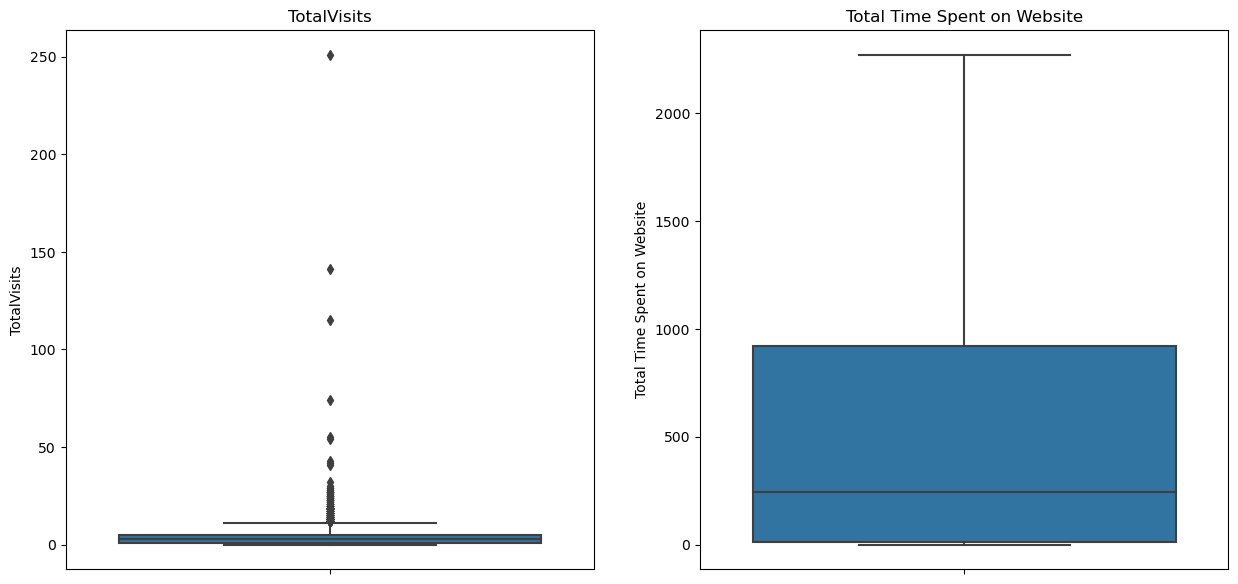

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

sns.boxplot(y=leads['TotalVisits'], ax=ax[0])
ax[0].set_title('TotalVisits')

sns.boxplot(y=leads['Total Time Spent on Website'], ax=ax[1])
ax[1].set_title('Total Time Spent on Website')

plt.show()


In [29]:
leads['TotalVisits'].describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.9, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
1%          0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [30]:
Q1 = np.percentile(leads['TotalVisits'], 25)
Q3 = np.percentile(leads['TotalVisits'], 75)
IQR = (Q3-Q1)
upper_fense = Q3+1.5 * IQR
Q1, Q3, IQR, upper_fense


(1.0, 5.0, 4.0, 11.0)

Observatoin:

- 'Total Time Spent on Website' has no outliers
- 'TotalVisits': Out of total 9074 records 83 Values are above the 99 percentile value which is 17 and the upper fense is at 11. These can be considered as outliers

In [31]:
# Identifying columns with contineous variables
unique_values = pd.DataFrame({
    'Column name': [i for i in leads.select_dtypes(exclude=object).columns],
    'Unique Values': [', '.join(str(item) for item in leads[i].unique().tolist())
                      for i in leads.select_dtypes(exclude=object).columns],
    'Unique Count': [len(leads[i].unique()) for i in leads.select_dtypes(exclude=object).columns]
})

unique_values.sort_values(by='Unique Count', ascending=False)

Column name  \
2  Total Time Spent on Website   
3         Page Views Per Visit   
1                  TotalVisits   
0                    Converted   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [32]:
leads[unique_values['Column name']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Converted                    9074 non-null   int64  
 1   TotalVisits                  9074 non-null   float64
 2   Total Time Spent on Website  9074 non-null   int64  
 3   Page Views Per Visit         9074 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 354.5 KB


Looks like all the datatypes are correct. No other outliers present in dataset. Lets remove the  outliers from 'TotalVisits'

In [33]:
leads = leads[~(leads['TotalVisits']>17)]

In [34]:
leads.shape

(8991, 23)

-

### Data Visualisation

#### Univariate analysis

Purpose of univariate analysis is to see what kind of distributions we have of the data.

In [35]:
# Checking which columns have have catagorical variables so that we can plot count plots and see their distributions
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8991 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8991 non-null   object 
 1   Lead Source                                    8991 non-null   object 
 2   Do Not Email                                   8991 non-null   object 
 3   Do Not Call                                    8991 non-null   object 
 4   Converted                                      8991 non-null   int64  
 5   TotalVisits                                    8991 non-null   float64
 6   Total Time Spent on Website                    8991 non-null   int64  
 7   Page Views Per Visit                           8991 non-null   float64
 8   Last Activity                                  8991 non-null   object 
 9   Country                                        8991 

After looking at the data we can consider all the columns except 'Total Time Spent on Website' and 'Page Views Per Visit' as catagorical variables and plot a countplot for these.

In [36]:
uni_cols = [i for i in leads.columns if i not in ['Total Time Spent on Website', 'Page Views Per Visit']]
len(uni_cols), leads.shape, uni_cols

(21,
 (8991, 23),
 ['Lead Origin',
  'Lead Source',
  'Do Not Email',
  'Do Not Call',
  'Converted',
  'TotalVisits',
  'Last Activity',
  'Country',
  'Specialization',
  'What is your current occupation',
  'What matters most to you in choosing a course',
  'Search',
  'Newspaper Article',
  'X Education Forums',
  'Newspaper',
  'Digital Advertisement',
  'Through Recommendations',
  'Tags',
  'City',
  'A free copy of Mastering The Interview',
  'Last Notable Activity'])

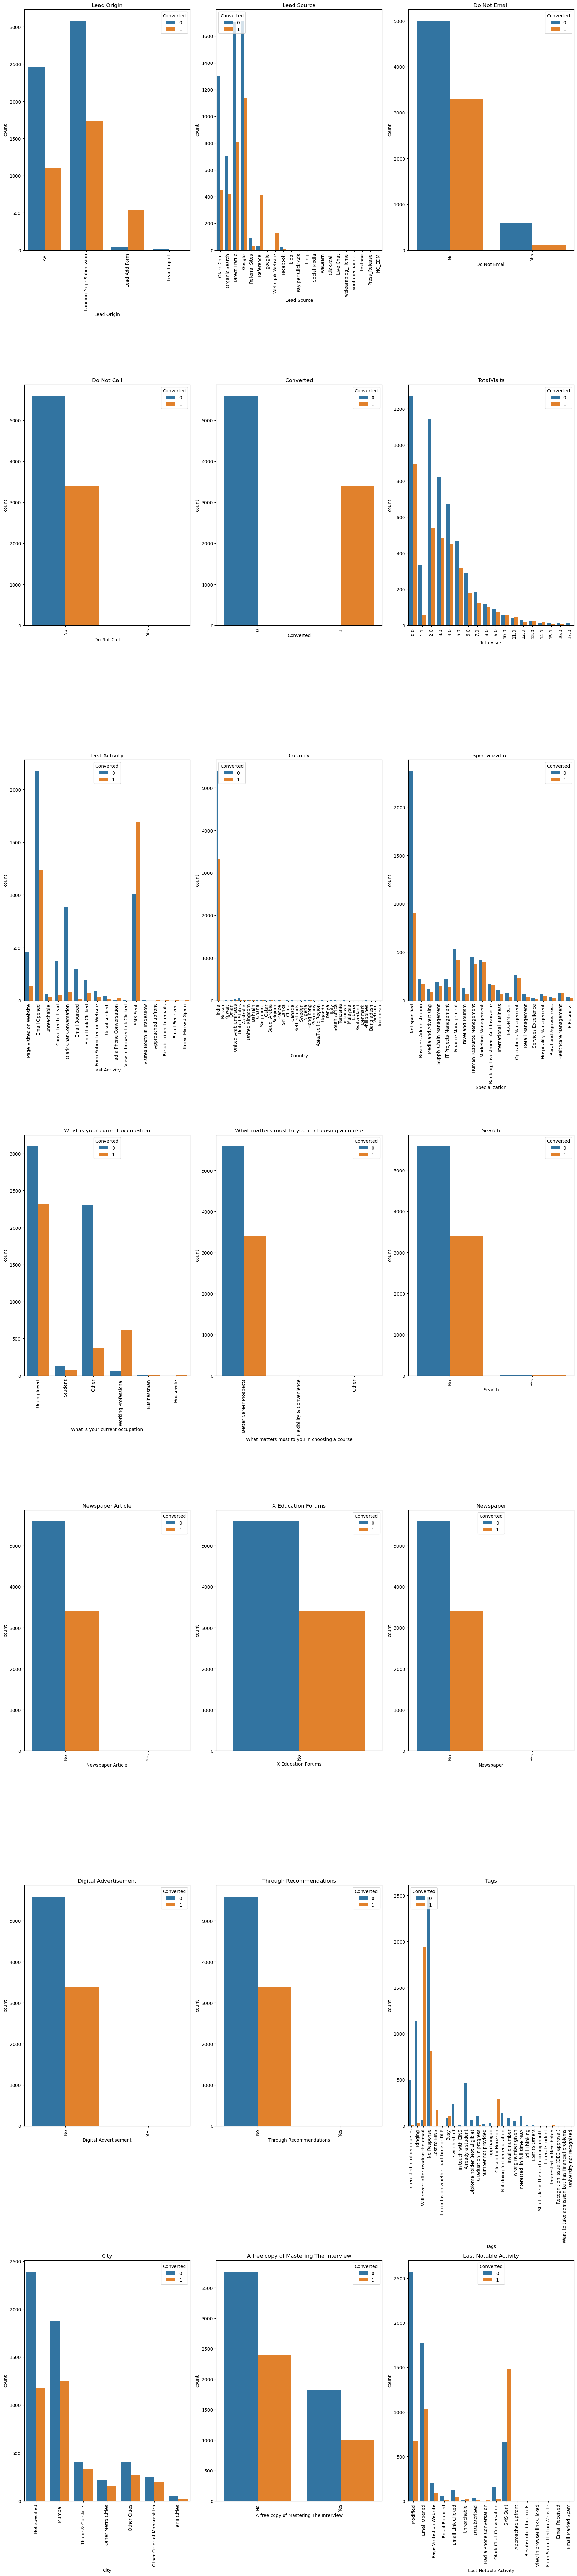

In [37]:
cols = 3
rows = int(round(len(uni_cols)/cols,0))
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(18, 80))

iter  = 0
for row in range(rows):
    for col in range(cols):
        if iter < 23:
            sns.countplot(x=leads[uni_cols[iter]], hue=leads.Converted, ax=ax[row, col])
            ax[row, col].set_title(uni_cols[iter])
            ax[row, col].set_xticklabels(ax[row, col].get_xticklabels(), rotation=90)   
            
            iter += 1

plt.tight_layout()
plt.show()

In [38]:
for i in uni_cols:
    print(i, '\n')
    print(leads[i].value_counts(normalize=True, dropna=False))
    print('--/'*20)

Lead Origin 

Landing Page Submission    0.535980
API                        0.396174
Lead Add Form              0.064509
Lead Import                0.003337
Name: Lead Origin, dtype: float64
--/--/--/--/--/--/--/--/--/--/--/--/--/--/--/--/--/--/--/--/
Lead Source 

Google               0.316984
Direct Traffic       0.279391
Olark Chat           0.194750
Organic Search       0.125125
Reference            0.049160
Welingak Website     0.014348
Referral Sites       0.013680
Facebook             0.003448
bing                 0.000667
google               0.000556
Click2call           0.000445
Press_Release        0.000222
Social Media         0.000222
Live Chat            0.000222
youtubechannel       0.000111
testone              0.000111
Pay per Click Ads    0.000111
welearnblog_Home     0.000111
WeLearn              0.000111
blog                 0.000111
NC_EDM               0.000111
Name: Lead Source, dtype: float64
--/--/--/--/--/--/--/--/--/--/--/--/--/--/--/--/--/--/--/--/
Do Not E

Observations:
- Constant columns: Looks like there are several columns which are acting as constants, meaning with almost all the variables of one value. ['Do Not Call', 'Country', 'Search', 'X Education Forums', 'Newspaper Article', 'Digital Advertisement', 'Through Recommendations']
    - Dropping these columns as these wont be contributing to identify any patterns in data

- Conversion rate of this data is ~38%

In [39]:
leads = leads.drop(columns=['Do Not Call', 'Country', 'Search', 'X Education Forums', 'Newspaper Article', 'Newspaper', 'Digital Advertisement', 'Through Recommendations'])
print(leads.shape)
leads.head()

(8991, 15)


,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not specified,Unemployed,Better Career Prospects,Interested in other courses,Not specified,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not specified,Unemployed,Better Career Prospects,Ringing,Not specified,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not specified,Unemployed,Better Career Prospects,Will revert after reading the email,Mumbai,No,Modified


-

### Data Visualisation

#### Bivariate analysis

Performing bivariate analysis on the dataset to identify whether there is any statistically significant relationship is present in betweeen the variables.
- Scatter Plots: To check relation between varialble dtype combination Numerical - Numerical
- Correlation Analysis

Scatter plots for Numerical <--> Numerical pairs

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.


There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

<AxesSubplot:xlabel='TotalVisits', ylabel='Total Time Spent on Website'>

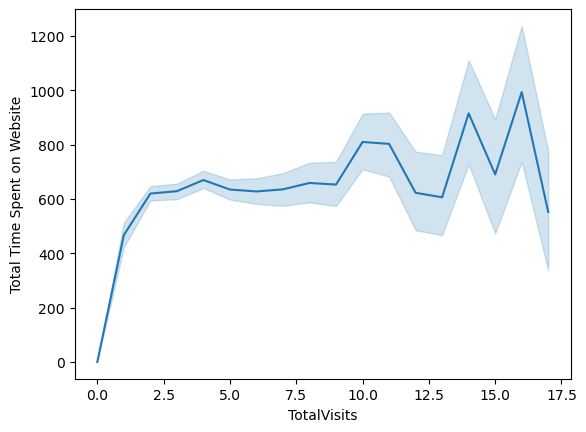

In [42]:
sns.lineplot(x='TotalVisits', y='Total Time Spent on Website', data=leads)

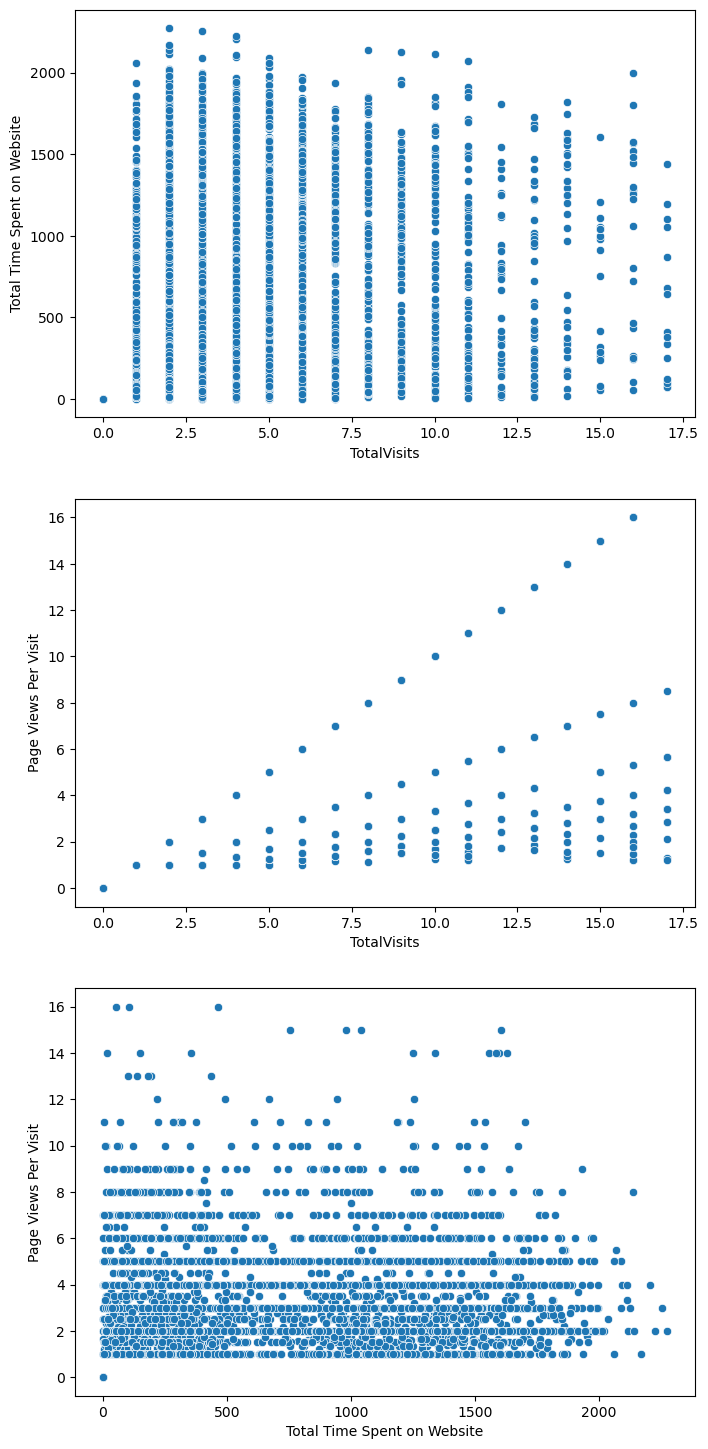

In [43]:
cols = leads.select_dtypes(exclude='object').columns.tolist()
cols.remove('Converted') # removing converted as its not a numeric variable.

fig, ax = plt.subplots(3, 1, figsize=(8, 18))
sns.scatterplot(x='TotalVisits', y='Total Time Spent on Website', data=leads, ax=ax[0])
sns.scatterplot(x='TotalVisits', y='Page Views Per Visit', data=leads, ax=ax[1])
sns.scatterplot(x='Total Time Spent on Website', y='Page Views Per Visit', data=leads, ax=ax[2])


plt.show()

Observations:
- There is no linear relation between 'TotalVisits' <--> 'Total Time Spent on Website'
- There is no linear relation between 'Total Time Spent on Website' <--> 'Page Views Per Visit'
- Some linear relation is observed on pair 'TotalVisits' <--> 'Page Views Per Visit' 

Bar plots for Numerical <--> Catagorical pairs

In [44]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not specified,Unemployed,Better Career Prospects,Interested in other courses,Not specified,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not specified,Unemployed,Better Career Prospects,Ringing,Not specified,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not specified,Unemployed,Better Career Prospects,Will revert after reading the email,Mumbai,No,Modified


In [45]:
obj_cols = leads.select_dtypes(include='object').columns.tolist()
obj_cols.remove('Do Not Email')
obj_cols, len(obj_cols)

(['Lead Origin',
  'Lead Source',
  'Last Activity',
  'Specialization',
  'What is your current occupation',
  'What matters most to you in choosing a course',
  'Tags',
  'City',
  'A free copy of Mastering The Interview',
  'Last Notable Activity'],
 10)

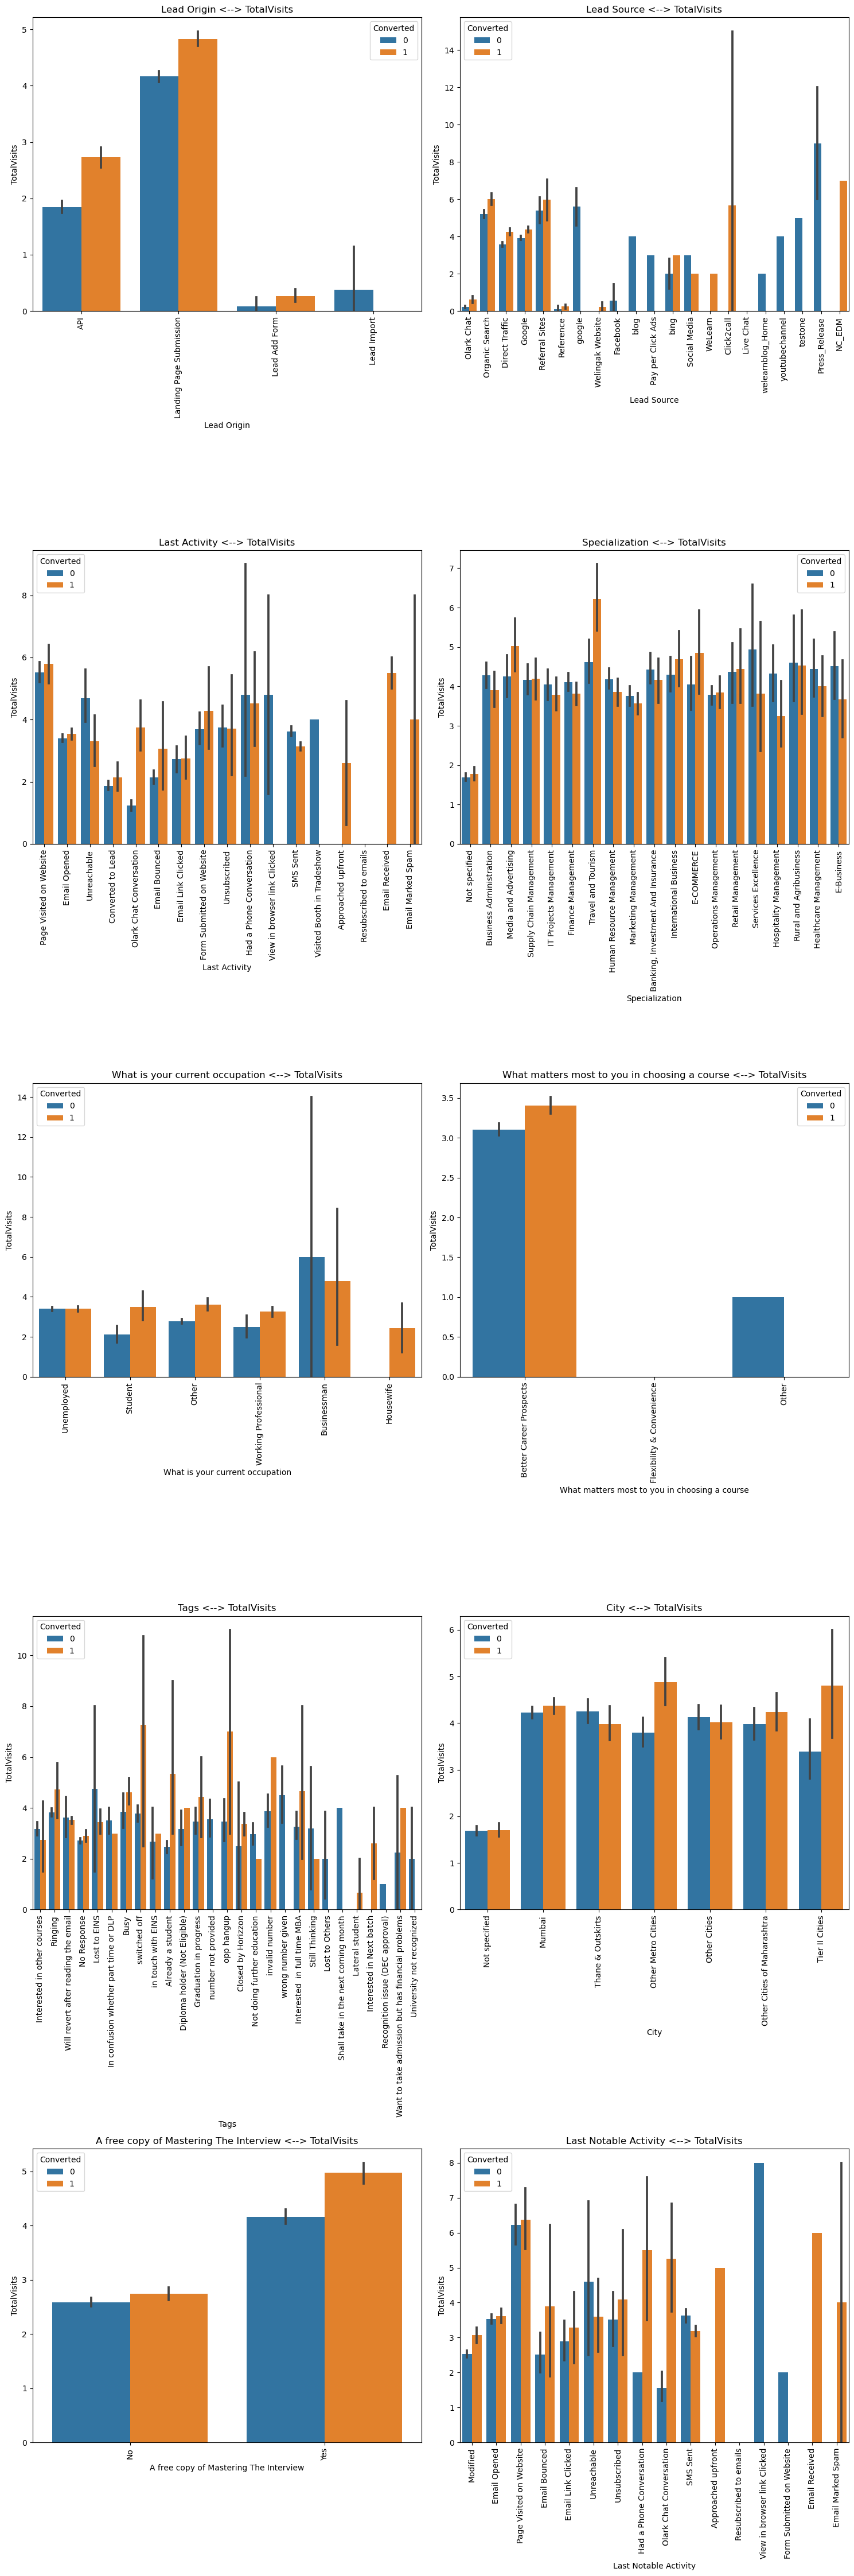

In [48]:
# Checking the relation between above columns with TotalVisits
fig, ax = plt.subplots(5,2,figsize=(15, 45))

iter = 0
for row in range(5):
    for col in range(2):
        sns.barplot(x=leads[obj_cols[iter]], y=leads['TotalVisits'], hue=leads.Converted, ax=ax[row, col])
        ax[row, col].set_title(f'{obj_cols[iter]} <--> TotalVisits')
        ax[row, col].set_xticklabels(ax[row, col].get_xticklabels(), rotation=90) 
        
        iter += 1
plt.tight_layout()
plt.show()
    

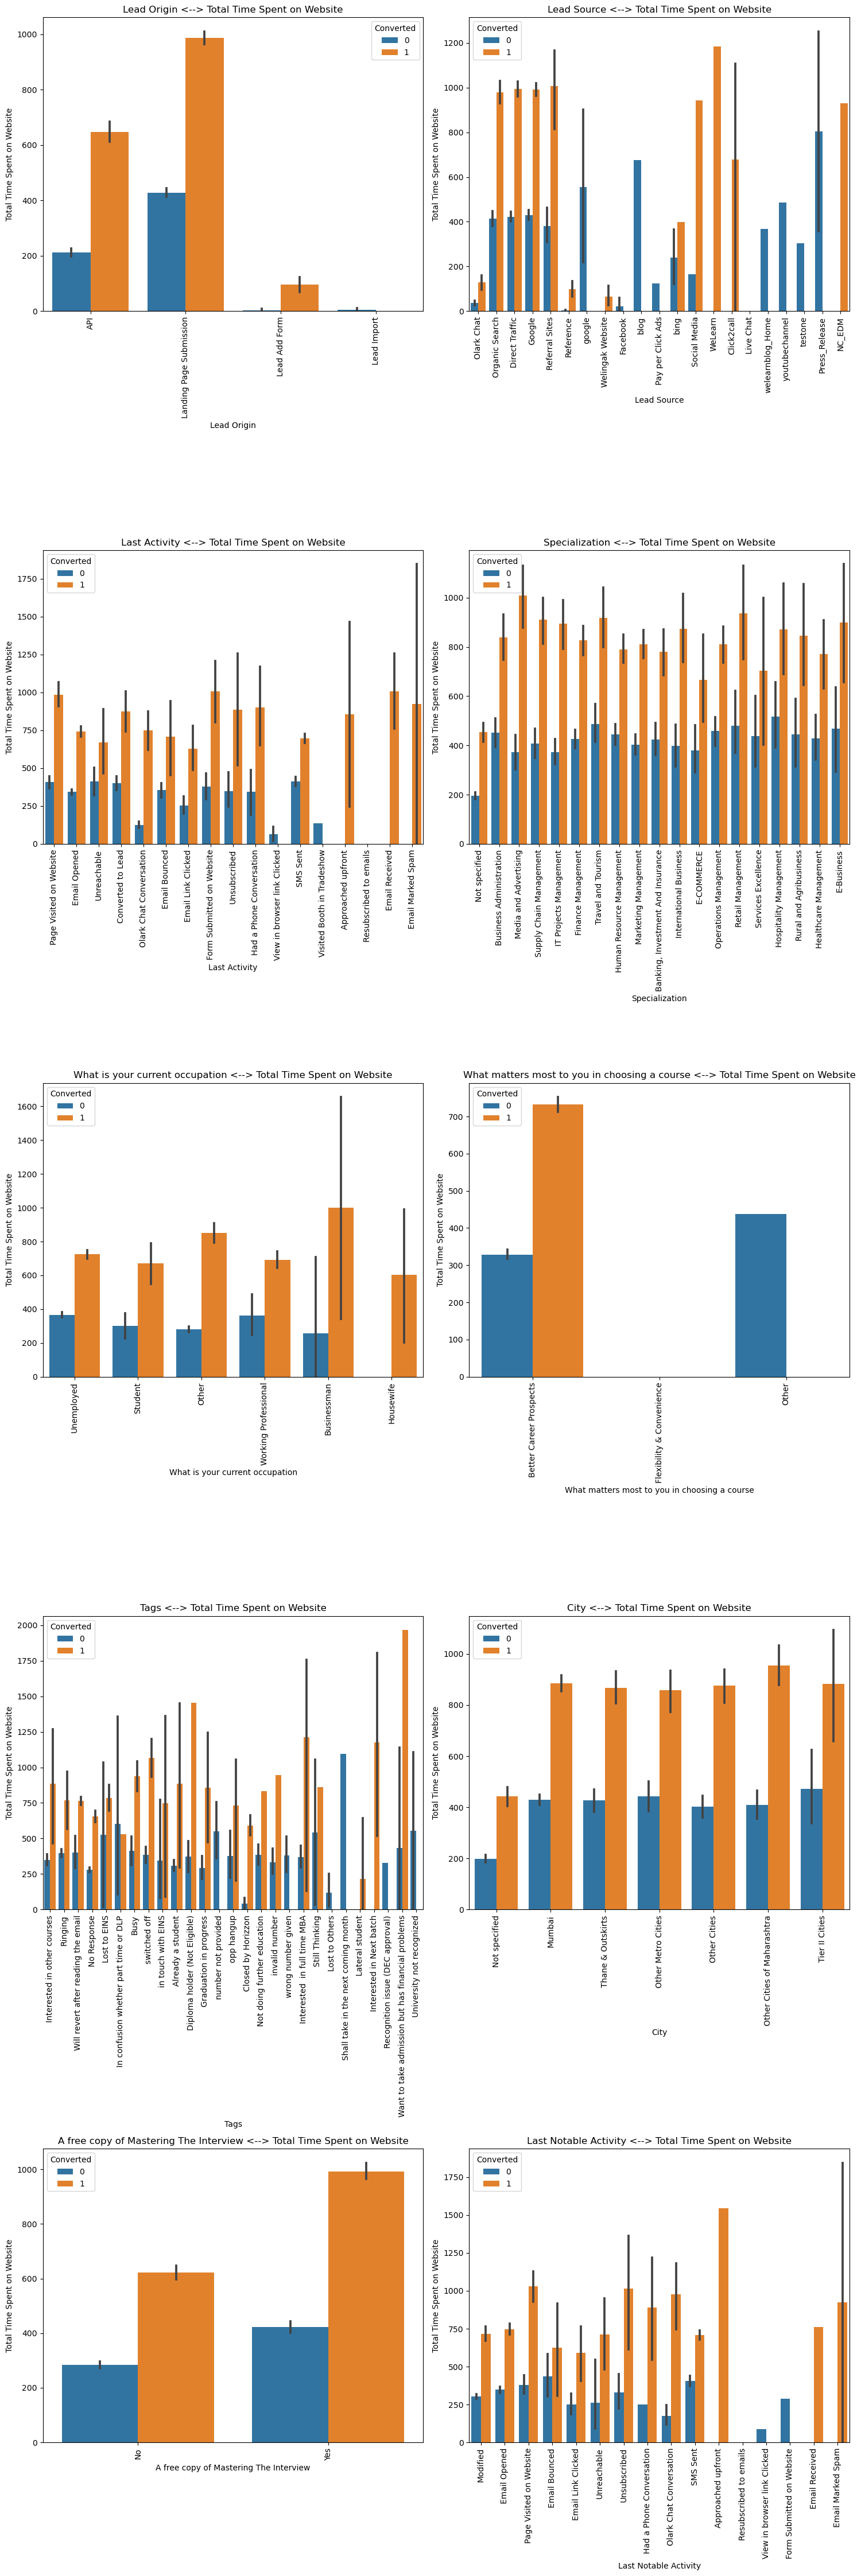

In [50]:
# Checking the relation between above columns with TotalVisits
fig, ax = plt.subplots(5,2,figsize=(15, 45))

iter = 0
for row in range(5):
    for col in range(2):
        sns.barplot(x=leads[obj_cols[iter]], y=leads['Total Time Spent on Website'], hue=leads.Converted, ax=ax[row, col])
        ax[row, col].set_title(f'{obj_cols[iter]} <--> Total Time Spent on Website')
        ax[row, col].set_xticklabels(ax[row, col].get_xticklabels(), rotation=90) 
        
        iter += 1
plt.tight_layout()

plt.show()

Heat plot

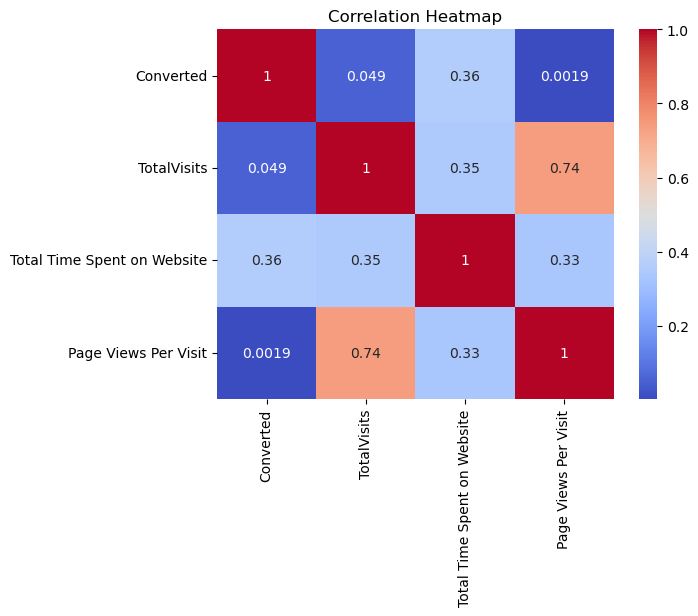

In [51]:
corr_matrix = leads.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap")

plt.show()

Observation:
- Total visit and Page views per visit have positive correlation

#### Multivariate analysis

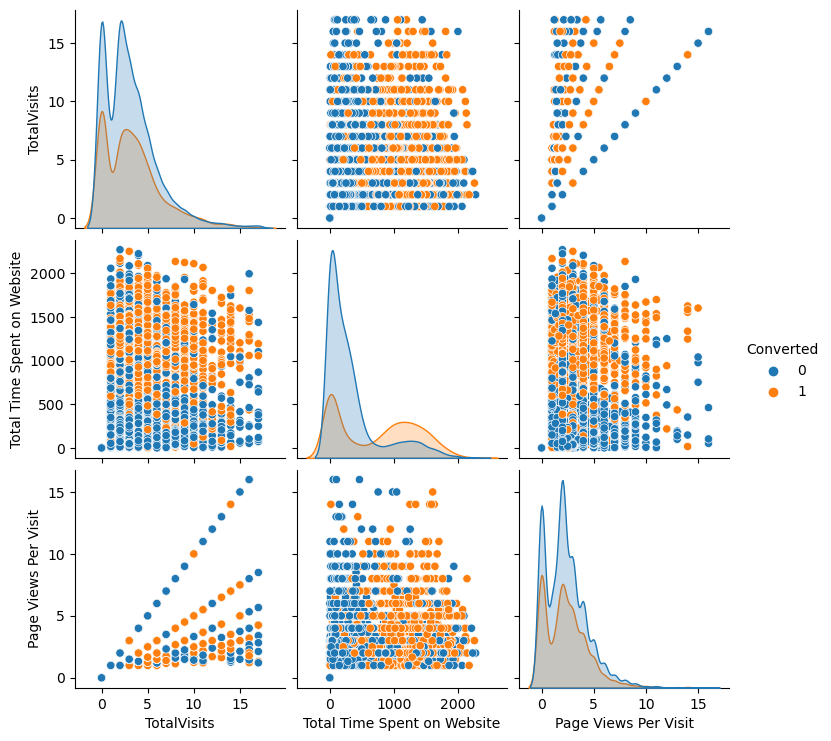

In [52]:
sns.pairplot(leads, hue='Converted')

## Data preperation for model building

In [53]:
leads

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.00,Page Visited on Website,Not specified,Unemployed,Better Career Prospects,Interested in other courses,Not specified,No,Modified
1,API,Organic Search,No,0,5.0,674,2.50,Email Opened,Not specified,Unemployed,Better Career Prospects,Ringing,Not specified,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Better Career Prospects,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.00,Converted to Lead,Not specified,Unemployed,Better Career Prospects,Will revert after reading the email,Mumbai,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,1,8.0,1845,2.67,Email Marked Spam,IT Projects Management,Unemployed,Better Career Prospects,Will revert after reading the email,Mumbai,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,Better Career Prospects,wrong number given,Mumbai,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,Better Career Prospects,invalid number,Mumbai,Yes,SMS Sent
9238,Landing Page Submission,Google,No,1,3.0,499,3.00,SMS Sent,Human Resource Management,Other,Better Career Prospects,No Response,Other Metro Cities,No,SMS Sent


    We have two columns with Yes and No values in them. Replacing Yes with 1 and No with 0

In [54]:
leads['A free copy of Mastering The Interview'].value_counts(), leads['Do Not Email'].value_counts()

(No     6154
 Yes    2837
 Name: A free copy of Mastering The Interview, dtype: int64,
 No     8292
 Yes     699
 Name: Do Not Email, dtype: int64)

In [55]:
leads[['A free copy of Mastering The Interview', 'Do Not Email']] = leads[['A free copy of Mastering The Interview', 'Do Not Email']].replace({'Yes':1, 'No':0})
leads

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.00,Page Visited on Website,Not specified,Unemployed,Better Career Prospects,Interested in other courses,Not specified,0,Modified
1,API,Organic Search,0,0,5.0,674,2.50,Email Opened,Not specified,Unemployed,Better Career Prospects,Ringing,Not specified,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Better Career Prospects,Will revert after reading the email,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,Ringing,Mumbai,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.00,Converted to Lead,Not specified,Unemployed,Better Career Prospects,Will revert after reading the email,Mumbai,0,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,1,1,8.0,1845,2.67,Email Marked Spam,IT Projects Management,Unemployed,Better Career Prospects,Will revert after reading the email,Mumbai,0,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,0,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,Better Career Prospects,wrong number given,Mumbai,1,SMS Sent
9237,Landing Page Submission,Direct Traffic,1,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,Better Career Prospects,invalid number,Mumbai,1,SMS Sent
9238,Landing Page Submission,Google,0,1,3.0,499,3.00,SMS Sent,Human Resource Management,Other,Better Career Prospects,No Response,Other Metro Cities,0,SMS Sent


In [96]:
# Identifying columns with catagorical variables
unique_values = pd.DataFrame({
    'Column name': [i for i in leads.select_dtypes(include=object).columns] ,
    'Unique Values': [(', '.join(str(item) for item in leads[i].unique().tolist())) 
                      for i in leads.select_dtypes(include=object).columns],
    'Unique Count': [leads[i].nunique() for i in leads.select_dtypes(include=object).columns] 
                    
})

unique_values.sort_values(by='Unique Count', ascending=False).reset_index()

,index,Column name,Unique Values,Unique Count
0,2,Last Activity,"Page Visited on Website, Email Opened, Others, Converted to Lead, Olark Chat Conversation, Email Bounced, Email Link Clicked, Form Submitted on Website, SMS Sent",9
1,3,Specialization,"Not specified, Business Administration, Media and Advertising, Management, Travel and Tourism, Banking, Investment And Insurance, International Business, E-COMMERCE, Others",9
2,1,Lead Source,"Olark Chat, Organic Search, Direct Traffic, Google, Referral Sites, Reference, Others, Welingak Website",8
3,6,Tags,"Interested in other courses, Ringing, Will revert after reading the email, No Response, Others, Already a student, Closed by Horizzon",7
4,7,City,"Not specified, Mumbai, Thane & Outskirts, Other Metro Cities, Other Cities, Other Cities of Maharashtra, Tier II Cities",7
5,8,Last Notable Activity,"Modified, Email Opened, Page Visited on Website, Others, Email Link Clicked, Olark Chat Conversation, SMS Sent",7
6,4,What is your current occupation,"Unemployed, Student, Other, Working Professional, Businessman, Housewife",6
7,0,Lead Origin,"API, Landing Page Submission, Lead Add Form, Lead Import",4
8,5,What matters most to you in choosing a course,"Better Career Prospects, Flexibility & Convenience, Other",3


As shown in above dataframe there are several columns with object dtype which have lot of unique values. If we were to create dummies for these the size of dataframe will expload.

Analysisng the variables in Tags column and trying to simplify the feature

C:\Users\munww\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


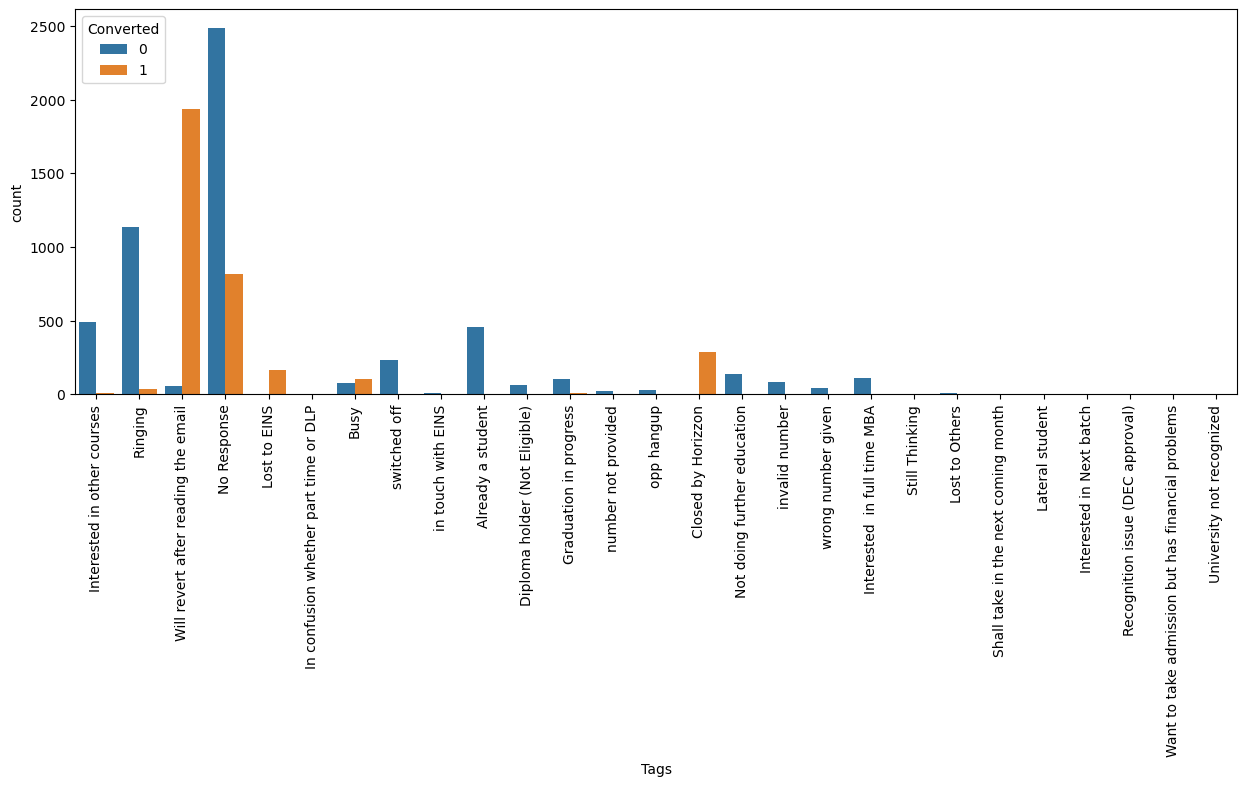

In [67]:
#visualizing count of Variables

plt.figure(figsize=(15,5))
s1=sns.countplot(leads['Tags'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

There are so many tags with very low frequency. We can combine these in a single tag 'Others'

In [69]:
Tags_df = pd.DataFrame(leads.Tags.value_counts(normalize=True, dropna=False)).reset_index()
Tags_df

,index,Tags
0,No Response,0.367256
1,Will revert after reading the email,0.222222
2,Ringing,0.130241
3,Interested in other courses,0.056279
4,Already a student,0.051607
5,Closed by Horizzon,0.032477
6,switched off,0.026582
7,Busy,0.020576
8,Lost to EINS,0.018908
9,Not doing further education,0.015349


In [70]:
tags_to_merge = Tags_df[Tags_df['Tags']<0.03]['index'].tolist()
tags_to_merge

['switched off',
 'Busy',
 'Lost to EINS',
 'Not doing further education',
 'Interested  in full time MBA',
 'Graduation in progress',
 'invalid number',
 'Diploma holder (Not Eligible)',
 'wrong number given',
 'opp hangup',
 'number not provided',
 'in touch with EINS',
 'Lost to Others',
 'Still Thinking',
 'In confusion whether part time or DLP',
 'Interested in Next batch',
 'Want to take admission but has financial problems',
 'Lateral student',
 'Shall take in the next coming month',
 'University not recognized',
 'Recognition issue (DEC approval)']

After reading the tagas and considering their frequency, looks like we can can combine following tags as 'Others'

    switched off                                          239
    Busy                                                  185
    Lost to EINS                                          170
    Not doing further education                           138
    Interested  in full time MBA                          116
    Graduation in progress                                111
    invalid number                                         83
    Diploma holder (Not Eligible)                          63
    wrong number given                                     47
    opp hangup                                             33
    number not provided                                    25
    in touch with EINS                                     12
    Lost to Others                                          7
    Still Thinking                                          6
    In confusion whether part time or DLP                   5
    Interested in Next batch                                5
    Want to take admission but has financial problems       5
    Lateral student                                         3
    Shall take in the next coming month                     2
    University not recognized                               2
    Recognition issue (DEC approval)                        1

In [71]:
leads.Tags = leads.Tags.replace(tags_to_merge, 'Others')
leads.Tags.value_counts()

No Response                            3302
Will revert after reading the email    1998
Others                                 1258
Ringing                                1171
Interested in other courses             506
Already a student                       464
Closed by Horizzon                      292
Name: Tags, dtype: int64

Analysisng the variables in Lead Source	column and trying to simplify the feature

In [72]:
ls_df = pd.DataFrame(leads['Lead Source'].value_counts(normalize=True, dropna=False)).reset_index()
ls_df

,index,Lead Source
0,Google,0.316984
1,Direct Traffic,0.279391
2,Olark Chat,0.194750
3,Organic Search,0.125125
4,Reference,0.049160
5,Welingak Website,0.014348
6,Referral Sites,0.013680
7,Facebook,0.003448
8,bing,0.000667
9,google,0.000556


All the sources which have a frequency less than 1% we can combine these as 'Others'

In [73]:
ls_mearge = ls_df[ls_df['Lead Source']<0.01]['index'].tolist()
ls_mearge

['Facebook',
 'bing',
 'google',
 'Click2call',
 'Press_Release',
 'Social Media',
 'Live Chat',
 'youtubechannel',
 'testone',
 'Pay per Click Ads',
 'welearnblog_Home',
 'WeLearn',
 'blog',
 'NC_EDM']

In [74]:
leads['Lead Source'] = leads['Lead Source'].replace(ls_mearge, 'Others')
leads['Lead Source'].value_counts()

Google              2850
Direct Traffic      2512
Olark Chat          1751
Organic Search      1125
Reference            442
Welingak Website     129
Referral Sites       123
Others                59
Name: Lead Source, dtype: int64

Analysisng the variables in Specialization column and trying to simplify the feature

In [75]:
sp_df = pd.DataFrame(leads.Specialization.value_counts(normalize=True, dropna=False)).reset_index()
sp_df

,index,Specialization
0,Not specified,0.363808
1,Finance Management,0.105772
2,Human Resource Management,0.091758
3,Marketing Management,0.090980
4,Operations Management,0.055277
5,Business Administration,0.043710
6,IT Projects Management,0.040374
7,Supply Chain Management,0.038149
8,"Banking, Investment And Insurance",0.036370
9,Media and Advertising,0.022133


Looks like the frequency is of values is presnt for most values in the dataset to a decent extent but there are multiple Management Specializations present in dataset. We can combine these and create a single value as Management

In [76]:
# Finding all the Management specializations
sp_merge = (sp_df[sp_df['index'].str.contains('Management')]['index'].tolist())
sp_merge

['Finance Management',
 'Human Resource Management',
 'Marketing Management',
 'Operations Management',
 'IT Projects Management',
 'Supply Chain Management',
 'Healthcare Management',
 'Hospitality Management',
 'Retail Management']

In [77]:
# Combining all the Management specializations
leads.Specialization = leads.Specialization.replace(sp_merge, 'Management')
leads.Specialization.value_counts()

Management                           4154
Not specified                        3271
Business Administration               393
Banking, Investment And Insurance     327
Media and Advertising                 199
Travel and Tourism                    197
International Business                174
E-COMMERCE                            110
Rural and Agribusiness                 70
E-Business                             56
Services Excellence                    40
Name: Specialization, dtype: int64

In [78]:
# Finding low frequency Specializations
sp_others = sp_df[sp_df['Specialization'] < 0.01]['index'].tolist()
sp_others

['Rural and Agribusiness', 'E-Business', 'Services Excellence']

In [79]:
# Combining low frequency Specializations
leads.Specialization = leads.Specialization.replace(sp_others, 'Others')
leads.Specialization.value_counts()

Management                           4154
Not specified                        3271
Business Administration               393
Banking, Investment And Insurance     327
Media and Advertising                 199
Travel and Tourism                    197
International Business                174
Others                                166
E-COMMERCE                            110
Name: Specialization, dtype: int64

Analysisng the variables in Last Activity column and trying to simplify the feature

In [80]:
la_df = pd.DataFrame(leads['Last Activity'].value_counts(normalize=True, dropna=False)).reset_index()
la_df

,index,Last Activity
0,Email Opened,0.379268
1,SMS Sent,0.300300
2,Olark Chat Conversation,0.107886
3,Page Visited on Website,0.066956
4,Converted to Lead,0.047603
5,Email Bounced,0.034590
6,Email Link Clicked,0.029585
7,Form Submitted on Website,0.012791
8,Unreachable,0.010010
9,Unsubscribed,0.006562


From above data its clear that there are several values present with very low frequency. We can combine these as Others. Setting the threshold as 1.1%

In [81]:
# Identifying values with low frequency
la_merge = la_df[la_df['Last Activity']<0.011]['index'].tolist()
la_merge

['Unreachable',
 'Unsubscribed',
 'Had a Phone Conversation',
 'View in browser link Clicked',
 'Approached upfront',
 'Email Received',
 'Email Marked Spam',
 'Visited Booth in Tradeshow',
 'Resubscribed to emails']

In [82]:
# Combining values with low frequency as Others
leads['Last Activity'] = leads['Last Activity'].replace(la_merge, 'Others')
leads['Last Activity'].value_counts()

Email Opened                 3410
SMS Sent                     2700
Olark Chat Conversation       970
Page Visited on Website       602
Converted to Lead             428
Email Bounced                 311
Email Link Clicked            266
Others                        189
Form Submitted on Website     115
Name: Last Activity, dtype: int64

Analysisng the variables in Last Notable Activity column and trying to simplify the feature

In [84]:
lna_df = pd.DataFrame(leads['Last Notable Activity'].value_counts(normalize=True, dropna=False)).reset_index()
lna_df

,index,Last Notable Activity
0,Modified,0.361473
1,Email Opened,0.311756
2,SMS Sent,0.237905
3,Page Visited on Website,0.032143
4,Olark Chat Conversation,0.020242
5,Email Link Clicked,0.019130
6,Email Bounced,0.006562
7,Unsubscribed,0.005005
8,Unreachable,0.003559
9,Had a Phone Conversation,0.001446


There are several values present with very low frequecny. Combining the values with less than 1% frequency as 'Others'

In [86]:
# Identifying values with low frequency
lna_merge = lna_df[lna_df['Last Notable Activity']<0.01]['index'].tolist()
lna_merge

['Email Bounced',
 'Unsubscribed',
 'Unreachable',
 'Had a Phone Conversation',
 'Email Marked Spam',
 'Approached upfront',
 'Resubscribed to emails',
 'View in browser link Clicked',
 'Form Submitted on Website',
 'Email Received']

In [87]:
# Merging values with low frequency
leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(lna_merge, 'Others')
leads['Last Notable Activity'].value_counts()

Modified                   3250
Email Opened               2803
SMS Sent                   2139
Page Visited on Website     289
Olark Chat Conversation     182
Email Link Clicked          172
Others                      156
Name: Last Notable Activity, dtype: int64

In [90]:
leads.shape, leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8991 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8991 non-null   object 
 1   Lead Source                                    8991 non-null   object 
 2   Do Not Email                                   8991 non-null   int64  
 3   Converted                                      8991 non-null   int64  
 4   TotalVisits                                    8991 non-null   float64
 5   Total Time Spent on Website                    8991 non-null   int64  
 6   Page Views Per Visit                           8991 non-null   float64
 7   Last Activity                                  8991 non-null   object 
 8   Specialization                                 8991 non-null   object 
 9   What is your current occupation                8991 

((8991, 15), None)

In [97]:
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      8989
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [98]:
# All the values in the column What matters most to you in choosing a course are same, dropping this column
leads.drop(columns='What matters most to you in choosing a course', inplace=True)
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8991 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8991 non-null   object 
 1   Lead Source                             8991 non-null   object 
 2   Do Not Email                            8991 non-null   int64  
 3   Converted                               8991 non-null   int64  
 4   TotalVisits                             8991 non-null   float64
 5   Total Time Spent on Website             8991 non-null   int64  
 6   Page Views Per Visit                    8991 non-null   float64
 7   Last Activity                           8991 non-null   object 
 8   Specialization                          8991 non-null   object 
 9   What is your current occupation         8991 non-null   object 
 10  Tags                                    8991 non-null   obje

Adding dummy variables

In [99]:
leads_prep_df = pd.get_dummies(data=leads, drop_first=True)
leads_prep_df

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Not specified,Specialization_Others,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_No Response,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,City_Not specified,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0.0,0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,0,0,5.0,674,2.50,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0
2,0,1,2.0,1532,2.00,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1.0,305,1.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,1,2.0,1428,1.00,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,1,8.0,1845,2.67,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
9236,0,0,2.0,238,2.00,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9237,1,0,2.0,199,2.00,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9238,0,1,3.0,499,3.00,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [100]:
leads_prep_df.describe()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Not specified,Specialization_Others,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_No Response,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,City_Not specified,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
count,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.00000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.00000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,0.077744,0.378045,3.217106,481.305973,2.344587,0.315538,0.535980,0.064509,0.003337,0.316984,0.19475,0.125125,0.006562,0.049160,0.013680,0.014348,0.03459,0.029585,0.379268,0.012791,0.107886,0.021021,0.066956,0.300300,0.043710,0.012234,0.019353,0.462018,0.022133,0.363808,0.018463,0.021911,0.001001,0.297853,0.022801,0.602936,0.074519,0.032477,0.056279,0.367256,0.139918,0.130241,0.222222,0.396619,0.074630,0.049494,0.041375,0.081304,0.008119,0.311756,0.361473,0.020242,0.017351,0.032143,0.237905
std,0.267784,0.484926,2.989530,544.883763,2.061548,0.464756,0.498731,0.245671,0.057671,0.465327,0.39603,0.330879,0.080745,0.216215,0.116167,0.118926,0.18275,0.169449,0.485232,0.112376,0.310253,0.143462,0.249959,0.458414,0.204461,0.109937,0.137769,0.498583,0.147125,0.481121,0.134626,0.146400,0.031625,0.457340,0.149276,0.489317,0.262628,0.177273,0.230472,0.482084,0.346921,0.336587,0.415763,0.489223,0.262808,0.216909,0.199166,0.273316,0.089745,0.463237,0.480454,0.140836,0.130582,0.176390,0.425824
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [101]:
# Creating X and y datasets
y = leads_prep_df.Converted
X = leads_prep_df.drop(columns='Converted')
X.shape, y.shape

((8991, 54), (8991,))

In [102]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.7, random_state=41)
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((6293, 54), (2698, 54), (6293,), (2698,))

We have 3 contineous variables on the dataset lets scale the data

In [ ]:
# scaler = MinMaxScaler() # Instantiating scaler
# scaler.fit_transform(X=Xtrain, y=ytrain)